# Customer Churn Prediction Project

The setup:
I am told this is a take-home assignment in the recruiting process for Sony.

You are provided with a sample dataset of a telecom company’s customers and it's expected to do the following tasks:

* Perform exploratory analysis and extract insights from the dataset.
* Split the dataset into train/test sets and explain your reasoning.
* Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
* Establish metrics to evaluate model performance.
* Discuss the potential issues with deploying the model into production.

You’re free to use any programming language (Python, R, Julia) that you’re familiar with and include the code together with your analysis.

## Get the Data

### Initial imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_data = pd.read_csv('Data_Science_Challenge.csv')

### Data Structure

In [ ]:
raw_data.shape

(3333, 21)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Woot! No missing data values at all!

In [ ]:
raw_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
raw_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


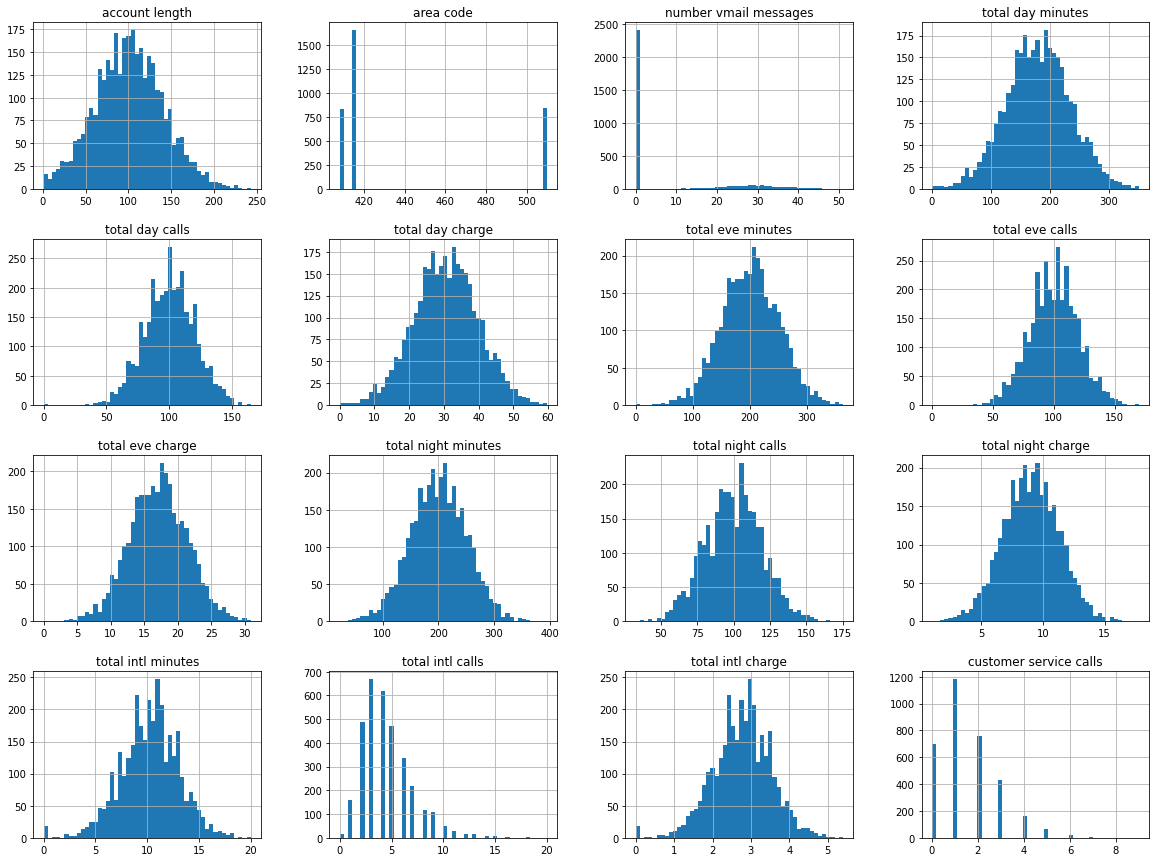

In [ ]:
sns.set(style="white", font_scale =1.5)
raw_data.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
# Checking Imbalance in Data
not_churned = play_set[play_set['churn']==0]['churn'].count()
churned = play_set[play_set['churn']==1]['churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5)) 
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned v/s Not Churned')
plt.show()

Since, the data is so heavily imbalanced, we should take note of this when separating into training and test sets. Utilize the stratified feature.

### Create a Test Set

In [ ]:
rnd_state = np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=rnd_state, stratified='churn')

In [ ]:
train_set.shape

(2666, 21)

In [ ]:
test_set.shape

(667, 21)

## Data Exploration and Preliminary Analysis

### Basic DataFrame information and descriptions

Let's make a copy of our data to "play" with while exploring.

In [ ]:
play_set = train_set.copy()

In [ ]:
play_set.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
817,UT,243,510,355-9360,no,no,0,95.5,92,16.24,...,63,13.91,264.2,118,11.89,6.6,6,1.78,2,False
1373,SC,108,415,399-6233,no,no,0,112.0,105,19.04,...,110,16.46,208.9,93,9.40,4.1,4,1.11,4,True
679,TX,75,415,384-2372,yes,no,0,222.4,78,37.81,...,111,27.80,208.0,104,9.36,8.7,9,2.35,1,True
56,CO,141,415,340-5121,no,no,0,126.9,98,21.57,...,62,15.30,140.8,128,6.34,8.0,2,2.16,1,False
1993,IN,86,510,357-7893,no,no,0,216.3,96,36.77,...,77,22.64,214.0,110,9.63,4.5,3,1.22,0,False


In [ ]:
play_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   object 
 1   account length          2666 non-null   int64  
 2   area code               2666 non-null   int64  
 3   phone number            2666 non-null   object 
 4   international plan      2666 non-null   object 
 5   voice mail plan         2666 non-null   object 
 6   number vmail messages   2666 non-null   int64  
 7   total day minutes       2666 non-null   float64
 8   total day calls         2666 non-null   int64  
 9   total day charge        2666 non-null   float64
 10  total eve minutes       2666 non-null   float64
 11  total eve calls         2666 non-null   int64  
 12  total eve charge        2666 non-null   float64
 13  total night minutes     2666 non-null   float64
 14  total night calls       2666 non-null 

Phone number will not be a useful feature, and area code is actually a categorical variable in disguise. Also, let's go ahead and code churn as Yes/No or 1/0 rather than booleans.

In [ ]:
play_set.drop('phone number', axis = 1, inplace = True)
play_set['area code'] = play_set['area code'].astype('str')
play_set['churn'] = play_set['churn'].astype('int')

In [ ]:
play_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   object 
 1   account length          2666 non-null   int64  
 2   area code               2666 non-null   object 
 3   international plan      2666 non-null   object 
 4   voice mail plan         2666 non-null   object 
 5   number vmail messages   2666 non-null   int64  
 6   total day minutes       2666 non-null   float64
 7   total day calls         2666 non-null   int64  
 8   total day charge        2666 non-null   float64
 9   total eve minutes       2666 non-null   float64
 10  total eve calls         2666 non-null   int64  
 11  total eve charge        2666 non-null   float64
 12  total night minutes     2666 non-null   float64
 13  total night calls       2666 non-null   int64  
 14  total night charge      2666 non-null 

In [ ]:
# Gives us a feel for the numeric columns
play_set.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.691673,7.981245,179.600713,100.542761,30.532629,200.698500,99.963241,17.059599,200.52982,99.911853,9.023905,10.237547,4.450113,2.764647,1.573143,0.143286
std,39.522338,13.647218,54.351004,19.886485,9.239653,50.693277,20.082759,4.308914,50.71026,19.545034,2.281993,2.796937,2.441808,0.755163,1.338454,0.350430
min,1.000000,0.000000,2.600000,30.000000,0.440000,0.000000,0.000000,0.000000,23.20000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.200000,88.000000,24.340000,165.825000,87.000000,14.092500,166.80000,86.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,179.200000,101.000000,30.460000,200.850000,100.000000,17.075000,200.85000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,19.000000,216.275000,114.000000,36.765000,234.650000,113.000000,19.945000,235.40000,113.000000,10.590000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.00000,175.000000,17.770000,20.000000,19.000000,5.400000,9.000000,1.000000


### Categorical Variables Hold Information too!

In [ ]:
#Now let's take a look at those categorical variables
play_set.describe(include='O')

,state,area code,international plan,voice mail plan
count,2666,2666,2666,2666
unique,51,3,2,2
top,WV,415,no,no
freq,84,1325,2409,1941


In [ ]:
cat_var = [ feature for feature in play_set.columns if play_set[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area code', 'international plan', 'voice mail plan']


In [ ]:
# Function to display the percentages
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

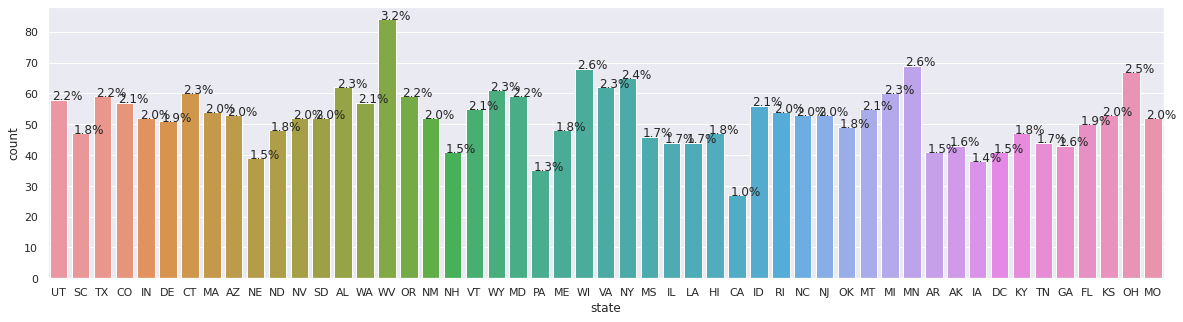

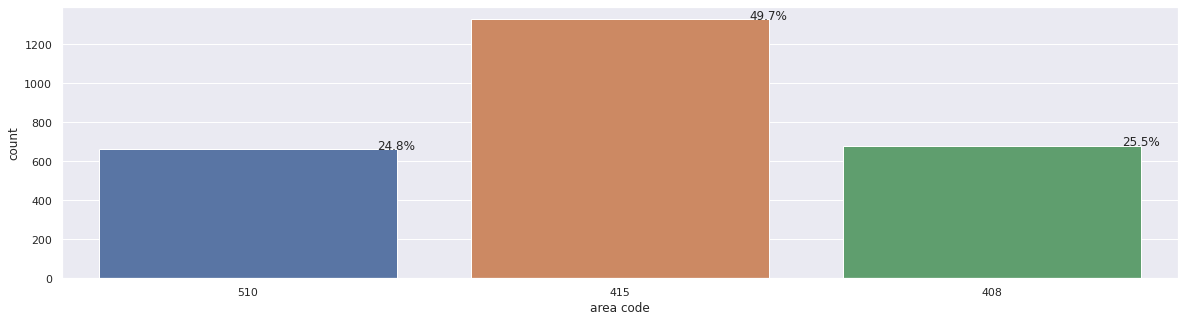

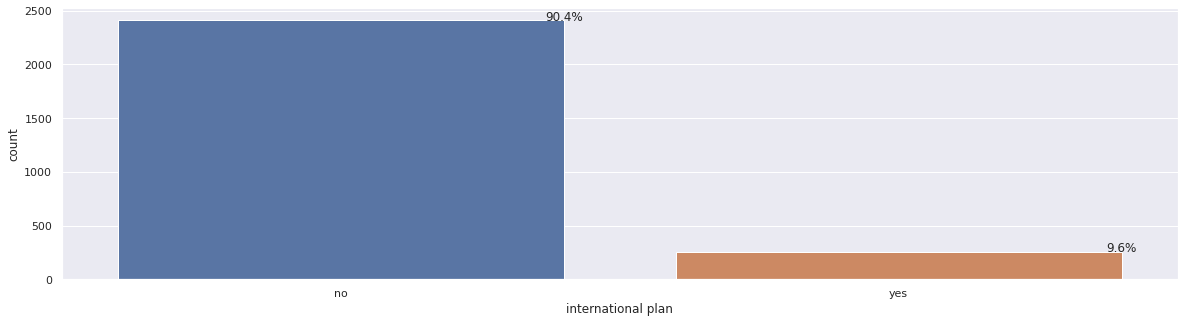

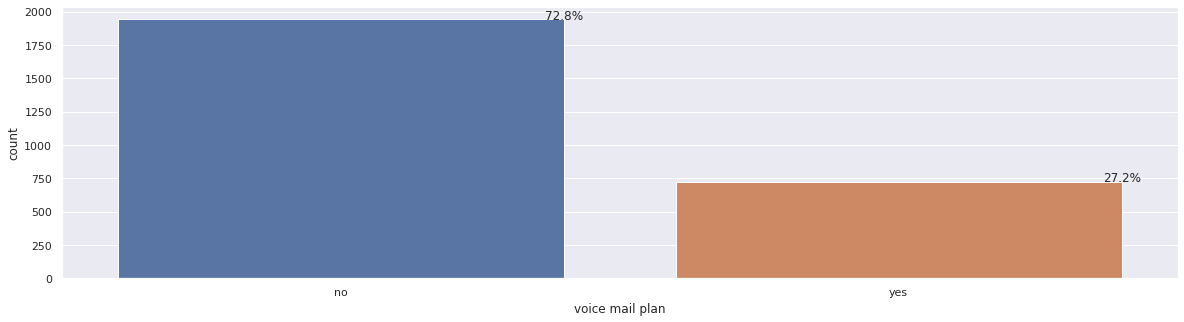

In [ ]:
for feature in cat_var:
    sns.set()
    plt.figure(figsize=(20,5))
    total = len(play_set)
    ax = sns.countplot(x = play_set[feature], data = play_set)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

### Now let's dive into the numerical variables a little more

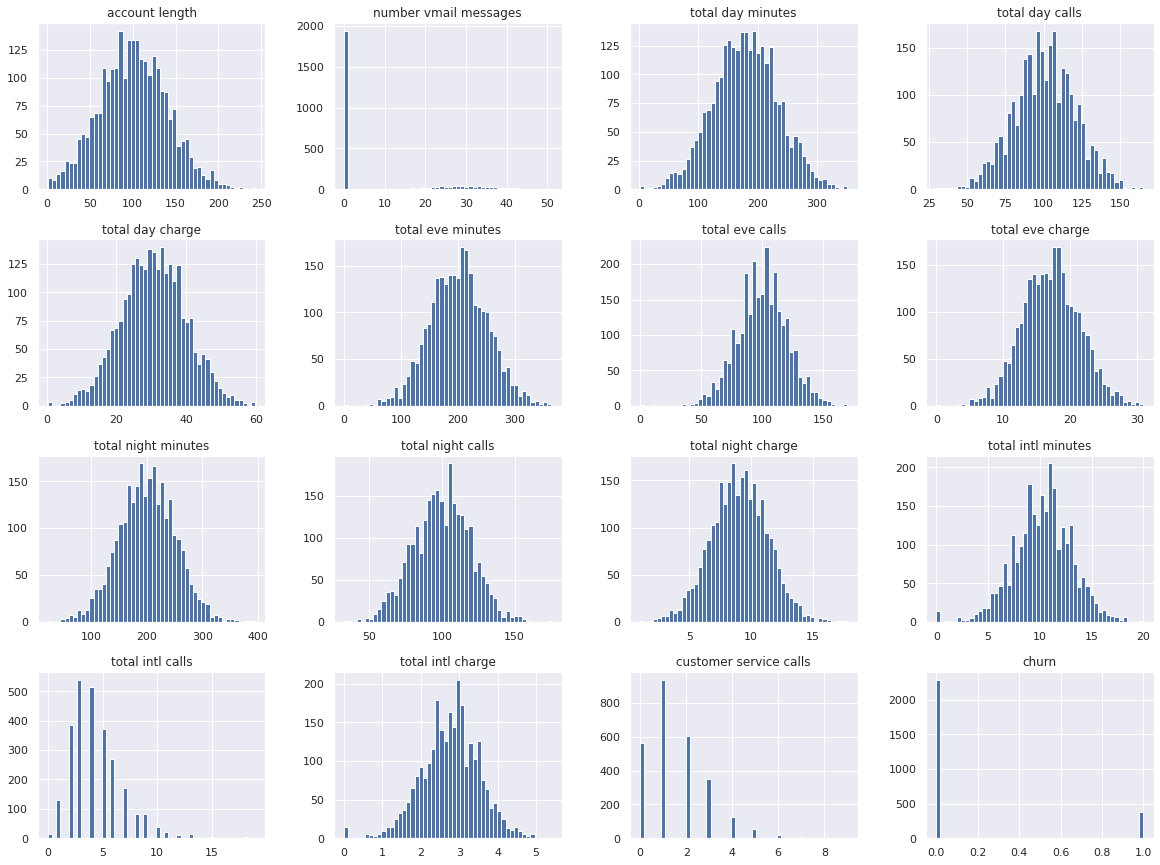

In [ ]:
play_set.hist(bins = 50, figsize = (20,15))
plt.show()

Not having noticed that calls and charges come in pairs, I have a feeling that these are going to be highly correlated. I would assume more talk = more money spent, just guessing. 

In [ ]:
corr_matrix = play_set.corr()

In [ ]:
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
customer service calls    0.212852
total day charge          0.191806
total day minutes         0.191804
total eve minutes         0.077947
total eve charge          0.077934
total intl charge         0.074336
total intl minutes        0.074331
total night minutes       0.022003
total night charge        0.021992
account length            0.019311
total eve calls           0.013705
total night calls        -0.000511
total day calls          -0.000987
total intl calls         -0.060052
number vmail messages    -0.088963
Name: churn, dtype: float64

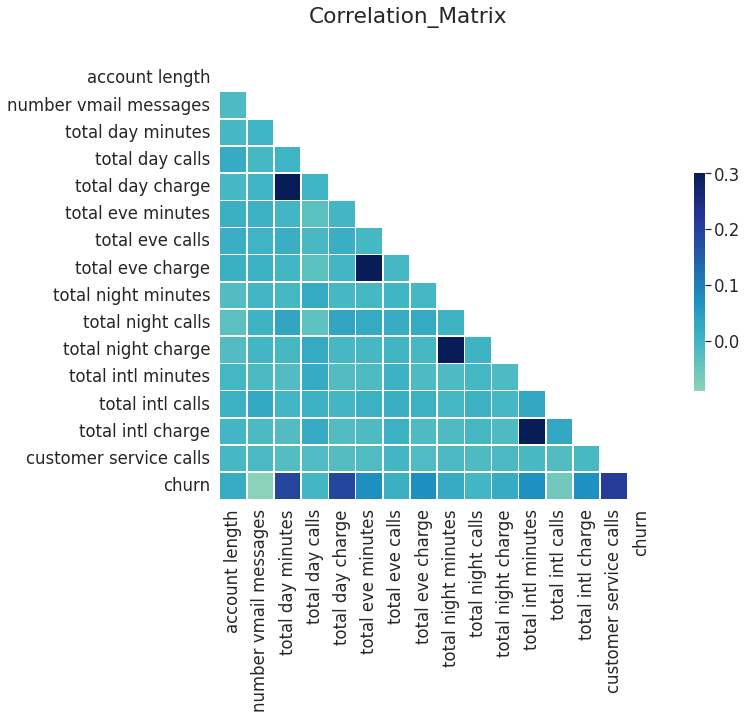

In [ ]:
sns.set(style="white", font_scale =1.5)
corr = corr_matrix

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As expected, there's a super high correlation in `total day minutes` and `total day charge`, and the same for night, eve, and international. Let's take note to drop these extra correlated features.

In [ ]:
play_set.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis =1, inplace = True)

In [ ]:
play_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   object 
 1   account length          2666 non-null   int64  
 2   area code               2666 non-null   object 
 3   international plan      2666 non-null   object 
 4   voice mail plan         2666 non-null   object 
 5   number vmail messages   2666 non-null   int64  
 6   total day calls         2666 non-null   int64  
 7   total day charge        2666 non-null   float64
 8   total eve calls         2666 non-null   int64  
 9   total eve charge        2666 non-null   float64
 10  total night calls       2666 non-null   int64  
 11  total night charge      2666 non-null   float64
 12  total intl calls        2666 non-null   int64  
 13  total intl charge       2666 non-null   float64
 14  customer service calls  2666 non-null 

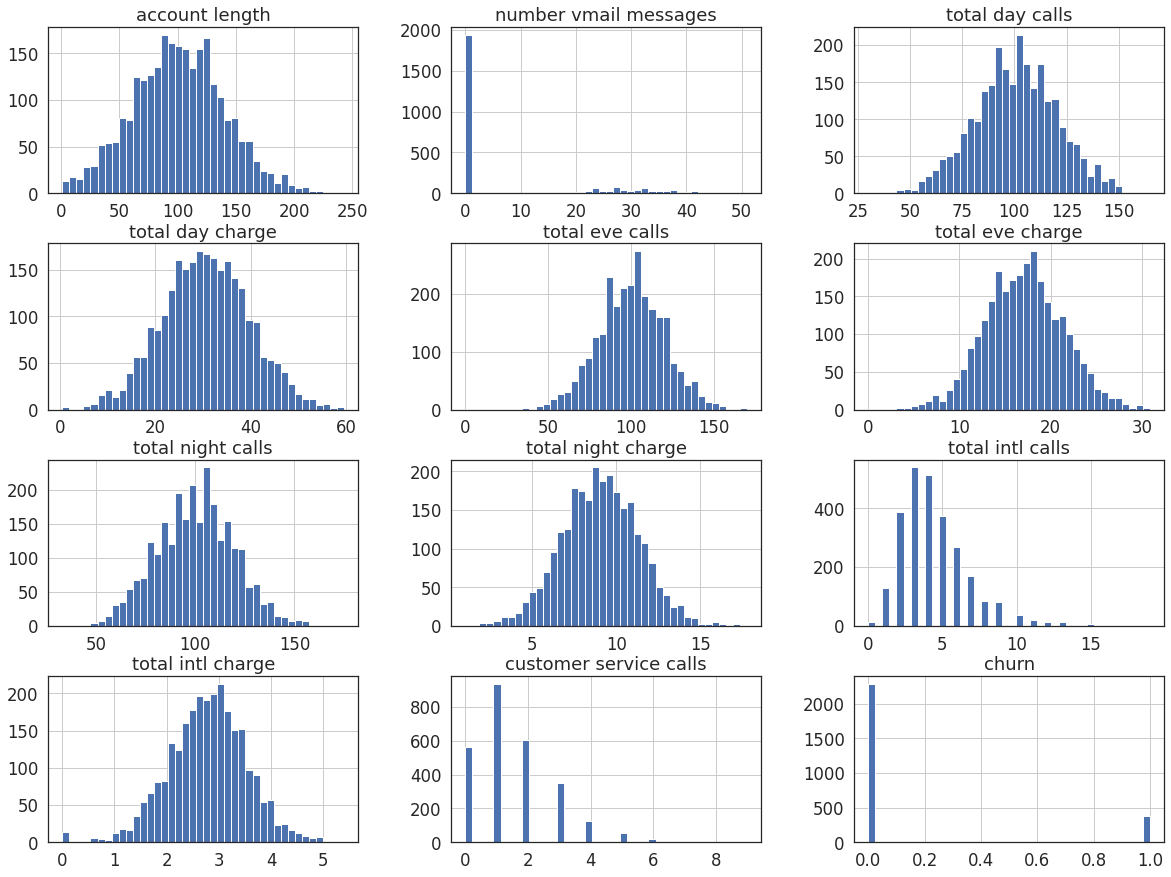

In [ ]:
# Let's take one more look here by dropping some of these categories that are correlated and doing it again.
play_set.hist(bins = 40, figsize = (20,15))
plt.show()

Most everything falls into a normal distribution it appears; exceptions are number voice mails messages, total international calls, and customer service calls. Let's standardize these for prediction in the pipeline. Also, as one would expect with a churn dataset, the churn is grossly imbalanced. 

not_churned:  2284 , churned:  382


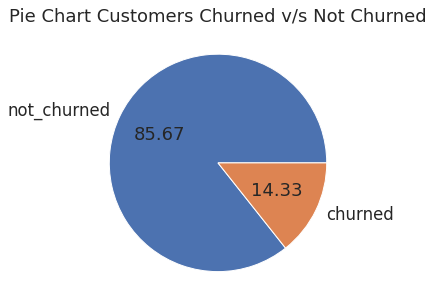

In [ ]:
# Checking Imbalance in Data
not_churned = play_set[play_set['churn']==0]['churn'].count()
churned = play_set[play_set['churn']==1]['churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5)) 
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned v/s Not Churned')
plt.show()

In [ ]:
num_var = [feature for feature in play_set.columns if play_set[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account length', 'number vmail messages', 'total day calls', 'total day charge', 'total eve calls', 'total eve charge', 'total night calls', 'total night charge', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [ ]:
num_var


['account length',
 'number vmail messages',
 'total day calls',
 'total day charge',
 'total eve calls',
 'total eve charge',
 'total night calls',
 'total night charge',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

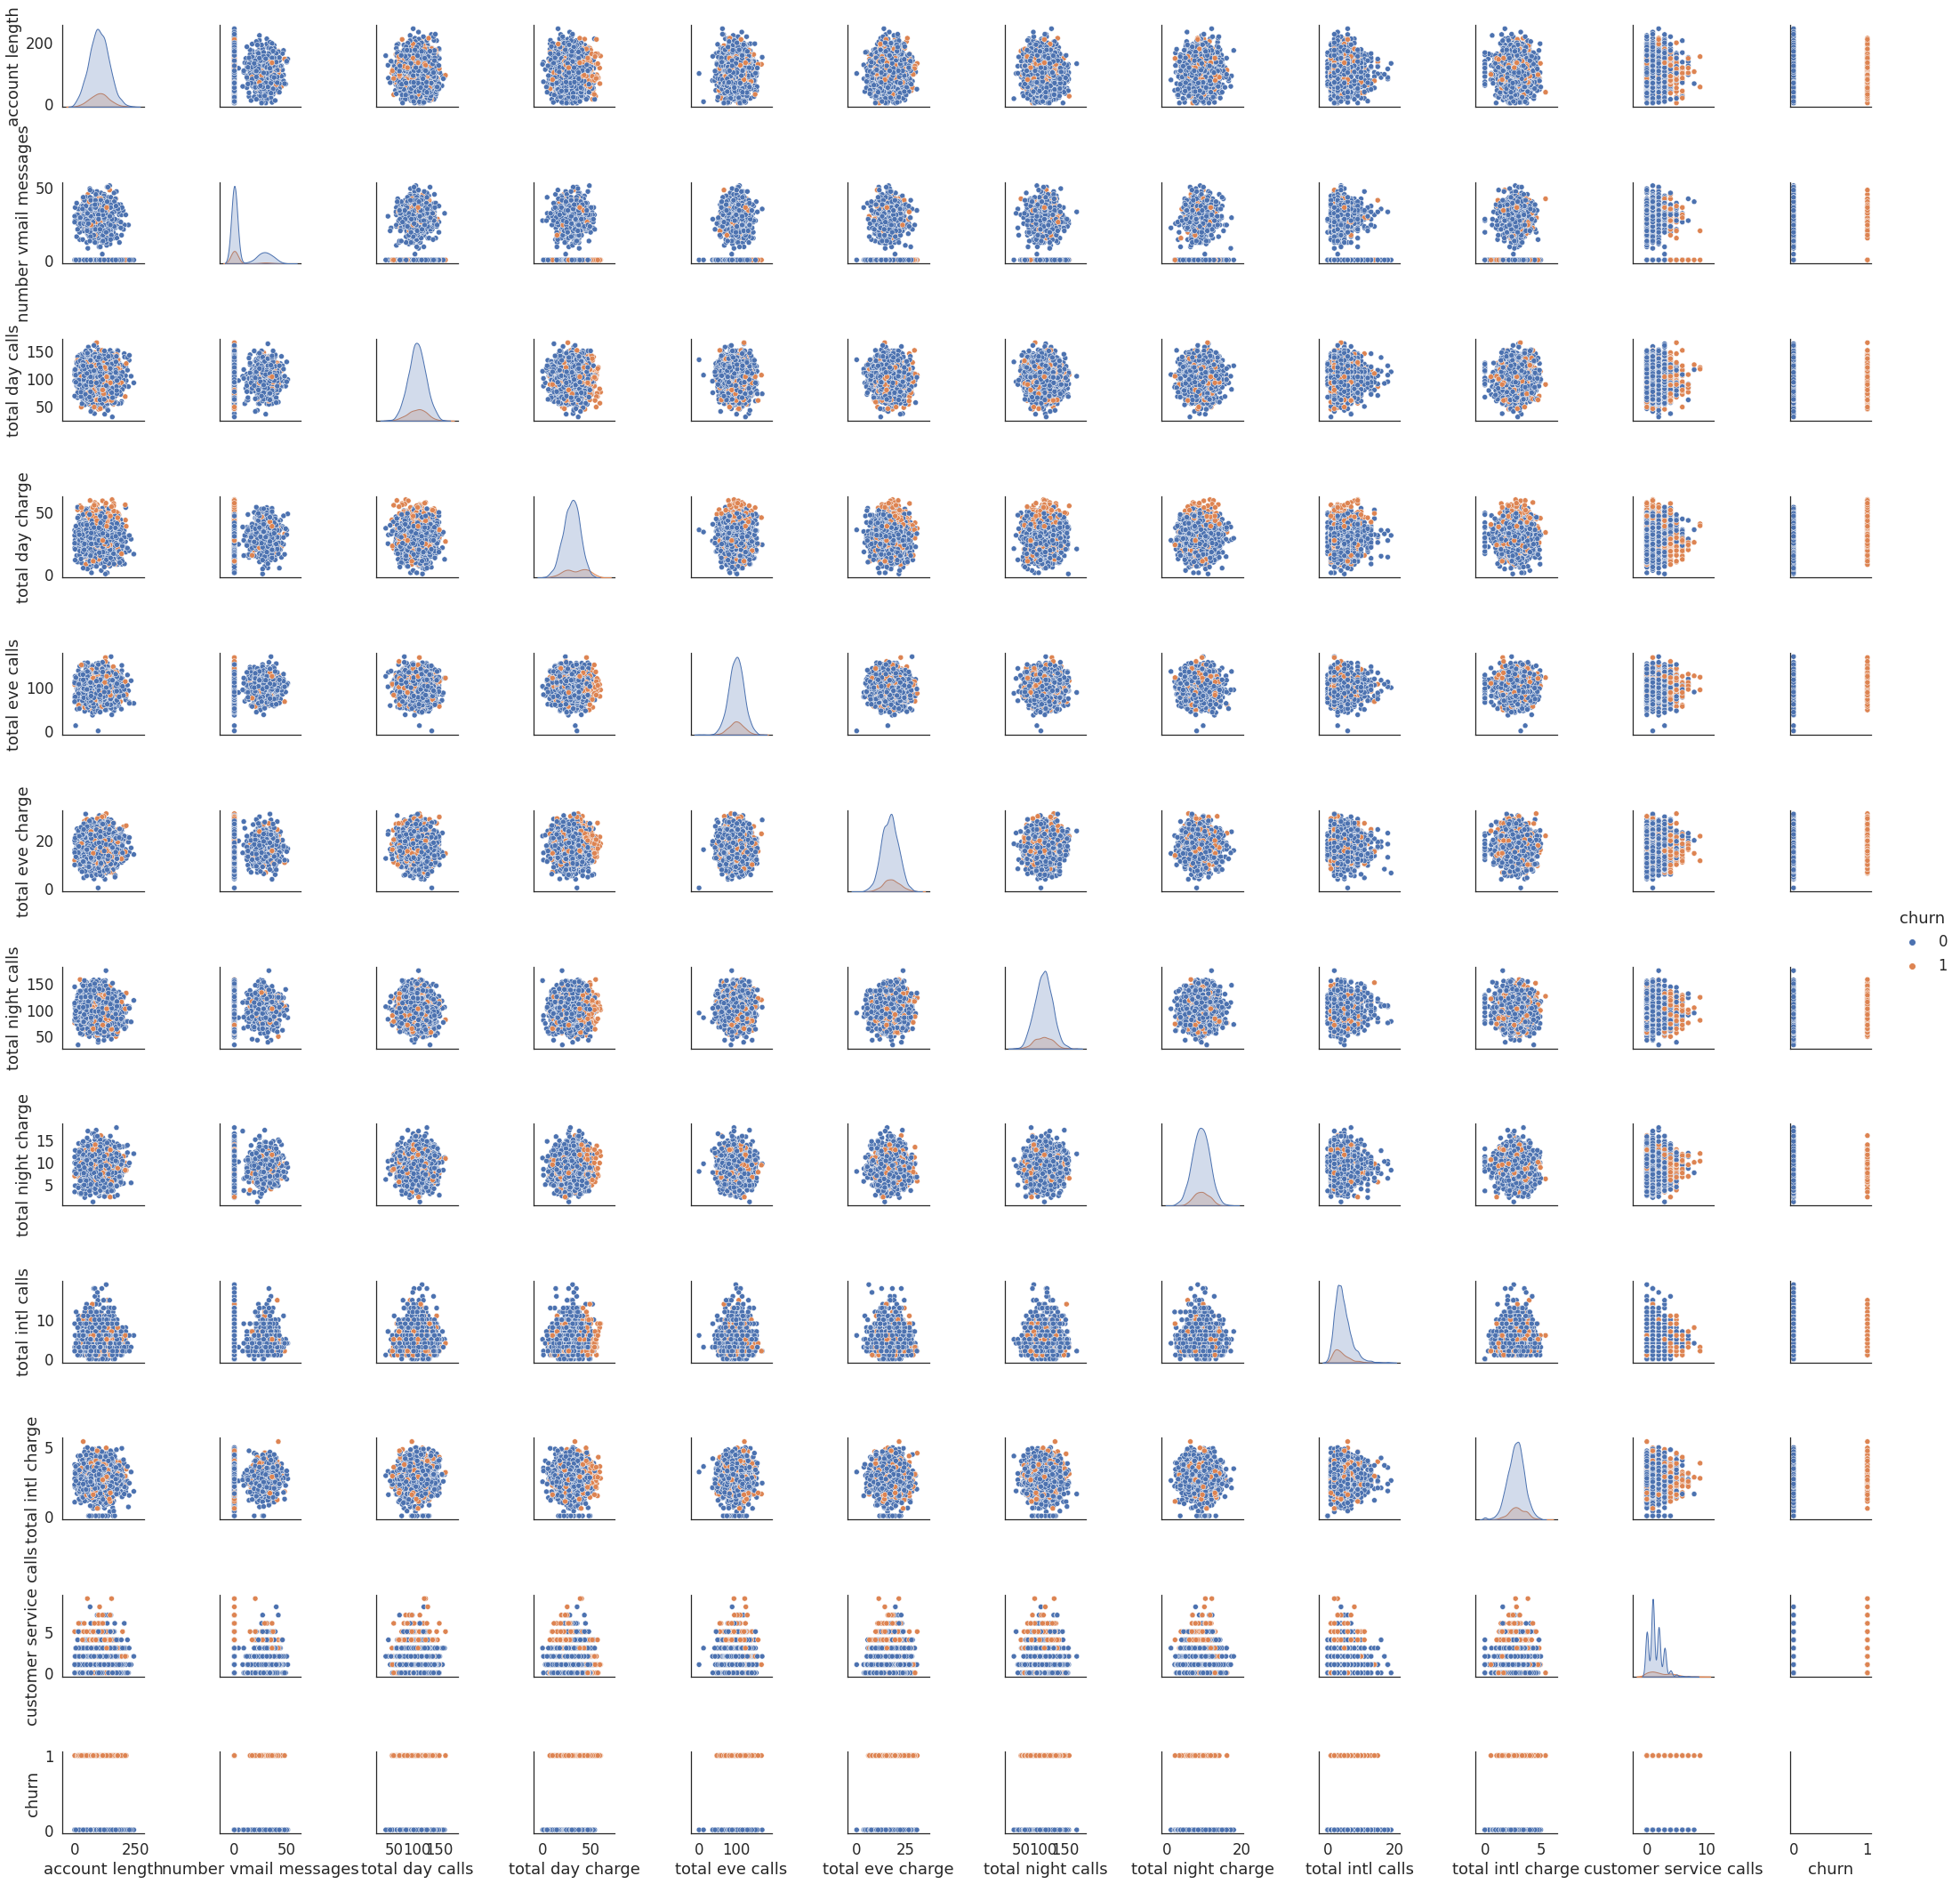

In [ ]:
sns.pairplot(play_set,vars= num_var,hue='churn')

We notice that features like `total Day Charge`, `total eve charge`, and `customer service calls` have good separability.

I am skipping checking for outliers right now. If time permits, I will come back and check for outliers as well, but the dataset is so small, that I am nervous.

## Preparing the data for ML models

### Feature Selection

Let's take all of our considerations on the `play_set` and build functions to handle this. Then we can build our piplines and prep for the ML models we will use.

1. Phone number isn't a useful feature, we drop it.
2. Area code should be categorical, not numeric.
3. Recode Churn to 1/0 rather than True/False
4. Based on feature correlations, we can drop `total day minutes`, `total eve minutes`, `total night minutes`, `total intl minutes`

We don't need the phone numbers for the model, and the area codes are really just categorical variables in disguise. Let's drop the phone numbers, and let's also turn the area codes into strings for cateogrical handling later.

In [ ]:
def number_change(df):
  df.drop('phone number', axis = 1, inplace = True)
  df['area code'] = df['area code'].astype('str')

In [ ]:
number_change(train_set)
number_change(test_set)

Before we split the test set and training sets, let's clean up the target column `churn`.

In [ ]:
def target_labels(df):
  df['churn'] = df['churn'].astype('int')

In [ ]:
target_labels(train_set)
target_labels(test_set)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   object 
 1   account length          2666 non-null   int64  
 2   area code               2666 non-null   object 
 3   international plan      2666 non-null   object 
 4   voice mail plan         2666 non-null   object 
 5   number vmail messages   2666 non-null   int64  
 6   total day minutes       2666 non-null   float64
 7   total day calls         2666 non-null   int64  
 8   total day charge        2666 non-null   float64
 9   total eve minutes       2666 non-null   float64
 10  total eve calls         2666 non-null   int64  
 11  total eve charge        2666 non-null   float64
 12  total night minutes     2666 non-null   float64
 13  total night calls       2666 non-null   int64  
 14  total night charge      2666 non-null 

In [ ]:
def drop_corr_feat(df):
  df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis =1, inplace = True)

In [ ]:
drop_corr_feat(train_set)
drop_corr_feat(test_set)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   object 
 1   account length          2666 non-null   int64  
 2   area code               2666 non-null   object 
 3   international plan      2666 non-null   object 
 4   voice mail plan         2666 non-null   object 
 5   number vmail messages   2666 non-null   int64  
 6   total day calls         2666 non-null   int64  
 7   total day charge        2666 non-null   float64
 8   total eve calls         2666 non-null   int64  
 9   total eve charge        2666 non-null   float64
 10  total night calls       2666 non-null   int64  
 11  total night charge      2666 non-null   float64
 12  total intl calls        2666 non-null   int64  
 13  total intl charge       2666 non-null   float64
 14  customer service calls  2666 non-null 

### Transformation Pipeline Construction

In [ ]:
training_cat = train_set[['state', 'area code', 'international plan', 'voice mail plan']]

In [ ]:
cat_attribs = list(training_cat)

In [ ]:
training_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               2666 non-null   object
 1   area code           2666 non-null   object
 2   international plan  2666 non-null   object
 3   voice mail plan     2666 non-null   object
dtypes: object(4)
memory usage: 168.7+ KB


In [ ]:
training_num = train_set.drop(['state', 'area code', 'international plan', 'voice mail plan', 'churn'], axis = 1)

In [ ]:
num_attribs = list(training_num)

In [ ]:
num_attribs

['account length',
 'number vmail messages',
 'total day calls',
 'total day charge',
 'total eve calls',
 'total eve charge',
 'total night calls',
 'total night charge',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [ ]:
training_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2666 non-null   int64  
 1   number vmail messages   2666 non-null   int64  
 2   total day calls         2666 non-null   int64  
 3   total day charge        2666 non-null   float64
 4   total eve calls         2666 non-null   int64  
 5   total eve charge        2666 non-null   float64
 6   total night calls       2666 non-null   int64  
 7   total night charge      2666 non-null   float64
 8   total intl calls        2666 non-null   int64  
 9   total intl charge       2666 non-null   float64
 10  customer service calls  2666 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 314.5 KB


#### Categorical Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_encoder = OneHotEncoder()
training_cat_1hot = cat_encoder.fit_transform(training_cat)
training_cat_1hot

<2666x58 sparse matrix of type '<class 'numpy.float64'>'
	with 10664 stored elements in Compressed Sparse Row format>

In [ ]:
cat_encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array(['408', '415', '510'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

#### Numerical Variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_scaler = StandardScaler()
training_num_scaled = num_scaler.fit_transform(training_num)
training_num_scaled

array([[ 3.60138166, -0.58493553, -0.42965679, ...,  0.63484856,
        -1.30413226,  0.31897761],
       [ 0.18495105, -0.58493553,  0.22417614, ..., -0.18437035,
        -2.19152464,  1.81351945],
       [-0.65017643, -0.58493553, -1.13378457, ...,  1.86367691,
        -0.5491865 , -0.42829331],
       ...,
       [-0.87793847, -0.58493553, -1.23437425, ...,  0.22523911,
        -0.37700589, -0.42829331],
       [ 1.72867155, -0.58493553,  0.52594519, ...,  0.63484856,
        -0.1253573 ,  0.31897761],
       [-1.63714527,  2.56648094,  1.12948329, ...,  0.63484856,
        -0.58892049,  0.31897761]])

#### Build the pipelines

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [ ]:
cat_pipeline = Pipeline([
    ('1_hot', OneHotEncoder())
])

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [ ]:
training_prepared = full_pipeline.fit_transform(train_set)

In [ ]:
training_prepared

<2666x69 sparse matrix of type '<class 'numpy.float64'>'
	with 39990 stored elements in Compressed Sparse Row format>

In [ ]:
X_train = full_pipeline.fit_transform(train_set)
y_train = train_set['churn'].copy()

X_test = full_pipeline.fit_transform(test_set)
y_test = test_set['churn'].copy()

##### SMOTE Oversampling

I thought of this after building my pipeline, so I will eventually go back and add this into the pipeline architecture.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Synthetic oversampling of minority class with smote
print(y_train.value_counts())
print('\n\n')
sm = SMOTE(sampling_strategy ='minority')
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print(X_train_sm.shape,y_train_sm.shape)
print(y_train_sm.value_counts())

0    2284
1     382
Name: churn, dtype: int64



(4568, 69) (4568,)
0    2284
1    2284
Name: churn, dtype: int64


## Model Selection

After having reviewed lots of other folks ML projects, I think a best practice I want to start using is building a dictionary of the hyperparameters before even building the model. Then I can run either GridSearchCV or RandomizedSearchCV to fine-tune a little more easily. 

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


### SVM

#### SVM with no balancing

Fitting 5 folds for each of 6 candidates, totalling 30 fits


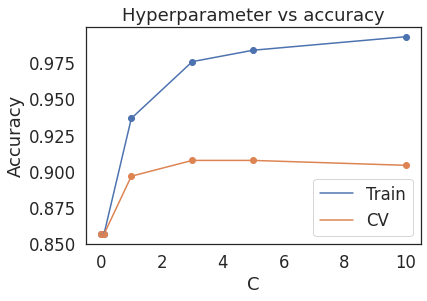

In [ ]:
# Grid Search To Get Best Hyperparameters 
parameters = {'C':[0.01,0.1,1,3,5,10]} 
svm_clf = SVC(random_state=rnd_state)

grid = GridSearchCV(estimator=svm_clf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1) 
grid.fit(X_train,y_train)  
cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV") 
plt.title('Hyperparameter vs accuracy') 
plt.legend() 
plt.xlabel('C') 
plt.ylabel('Accuracy') 
plt.show()

In [ ]:
best_parameter = grid.best_params_['C']
best_parameter

3

Train accuracy SVM:  0.9748687171792948
Test accuracy SVM:  0.9235382308845578
Recall Score:  0.5742574257425742
------------------------------------------------------------------------------------------------------------------------


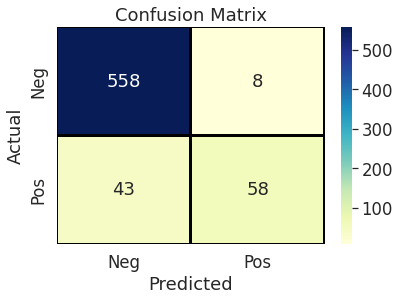

In [ ]:
# Training the model again using the optimum parameters discovered
svm_clf = SVC(C=best_parameter,random_state=rnd_state)
svm_clf.fit(X_train,y_train)

result1 = ["1.","SVM","No class balancing"] # saving result in list
y_pred_tr = svm_clf.predict(X_train)
print('Train accuracy SVM: ',accuracy_score(y_train,y_pred_tr))
result1.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = svm_clf.predict(X_test)
print('Test accuracy SVM: ',accuracy_score(y_test,y_pred_test))
result1.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result1.append(round(recall,2))
print("----"*30)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

#### SVM with class balancing using built-in class weights

Fitting 5 folds for each of 6 candidates, totalling 30 fits


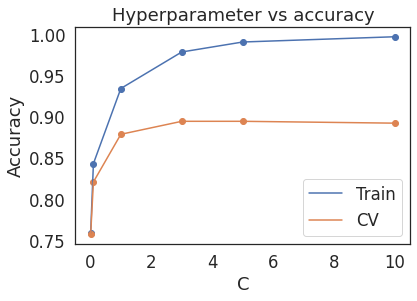

In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {'C':[0.01,0.1,1,3,5,10]}

svm_clf = SVC(class_weight='balanced',random_state=rnd_state)
grid = GridSearchCV(estimator=svm_clf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
best_parameter = grid.best_params_['C']
print(best_parameter)

3


Train accuracy SVM:  0.9756189047261815
Test accuracy SVM:  0.9115442278860569
Recall Score:  0.7128712871287128
----------------------------------------------------------------------------------------------------


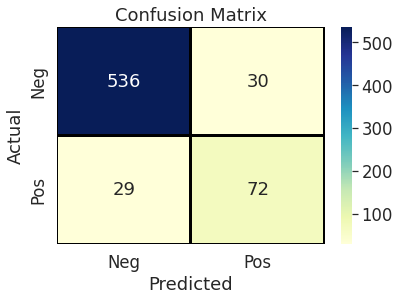

In [ ]:
# Training the model again using the optimal parameters discovered
svm_clf =  SVC(C=best_parameter,class_weight='balanced', random_state=rnd_state)
svm_clf.fit(X_train,y_train)

result2 = ["2.","SVM","Balanced using class weights"]
y_pred_tr = svm_clf.predict(X_train)
print('Train accuracy SVM: ',accuracy_score(y_train,y_pred_tr))
result2.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = svm_clf.predict(X_test)
print('Test accuracy SVM: ',accuracy_score(y_test,y_pred_test))
result2.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result2.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

#### SVM on SMOTE balanced sets

Fitting 5 folds for each of 6 candidates, totalling 30 fits


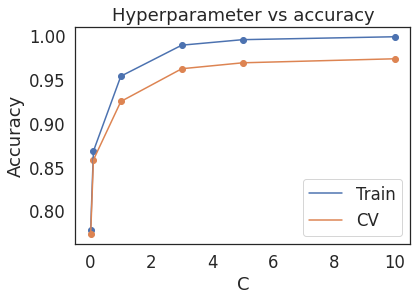

In [ ]:
# Grid Search To Get Best Hyperparameters 
parameters = {'C':[0.01,0.1,1,3,5,10]} 
svm_clf = SVC(random_state=rnd_state)

grid = GridSearchCV(estimator=svm_clf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1) 
grid.fit(X_train_sm,y_train_sm)  
cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV") 
plt.title('Hyperparameter vs accuracy') 
plt.legend() 
plt.xlabel('C') 
plt.ylabel('Accuracy') 
plt.show()

In [ ]:
best_parameter = grid.best_params_['C']
#best_parameter = 3
print(best_parameter)

10


Train accuracy SVM:  0.9993432574430823
Test accuracy SVM:  0.9085457271364318
Recall Score:  0.5742574257425742
------------------------------------------------------------------------------------------------------------------------


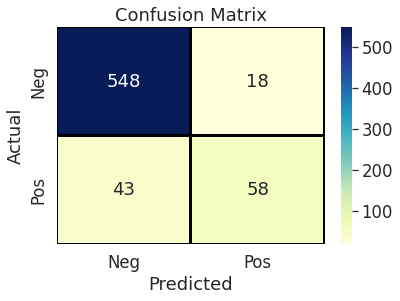

In [ ]:
# Training the model again using the optimum parameters discovered
svm_clf = SVC(C=best_parameter,random_state=rnd_state)
svm_clf.fit(X_train_sm,y_train_sm)

result3 = ["3.","SVM","SMOTE balancing"] # saving result in list
y_pred_tr = svm_clf.predict(X_train_sm)
print('Train accuracy SVM: ',accuracy_score(y_train_sm,y_pred_tr))
result3.append(round(accuracy_score(y_train_sm,y_pred_tr),2))

y_pred_test = svm_clf.predict(X_test)
print('Test accuracy SVM: ',accuracy_score(y_test,y_pred_test))
result3.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result3.append(round(recall,2))
print("----"*30)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

### Random Forest

#### RF no balancing

Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------------------------------------------------------------------------------------------------


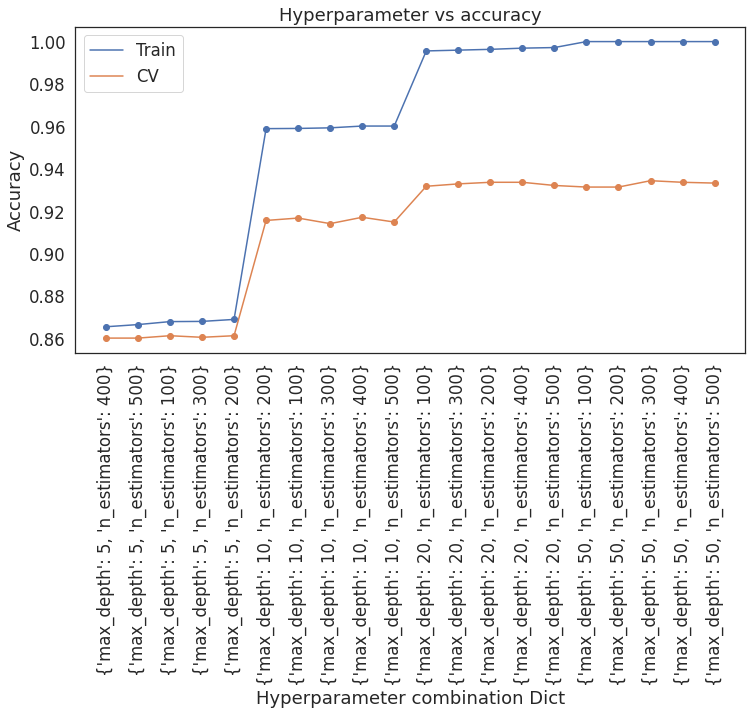

In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {'max_depth':[5,10,20,50], 'n_estimators': [100,200,300,400,500]}
clf_rf = RandomForestClassifier(random_state=rnd_state)      
grid = GridSearchCV(estimator=clf_rf,param_grid=parameters,scoring= 'accuracy',return_train_score= True,verbose=1)
grid.fit(X_train,y_train)

print("-----"*20)
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by= 'mean_train_score', ascending=True)
params = list(cv_result['params'].astype(str))

plt.figure(figsize=(12,6))
plt.scatter(params,cv_result['mean_train_score'])
plt.plot(params,cv_result['mean_train_score'],label='Train')
plt.scatter(params,cv_result['mean_test_score'])
plt.plot(params,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('Hyperparameter combination Dict')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

In [ ]:
grid.best_params_

{'max_depth': 50, 'n_estimators': 300}

In [ ]:
best_max_depth = grid.best_params_['max_depth']
best_n_estimator = grid.best_params_['n_estimators']

Train accuracy RF:  1.0
Test accuracy RF:  0.9325337331334332
Recall Score:  0.5544554455445545
----------------------------------------------------------------------------------------------------


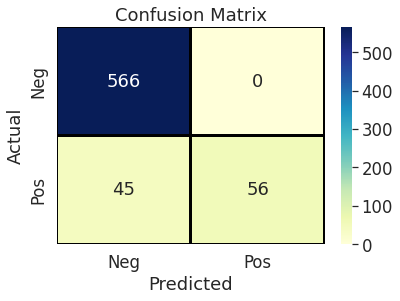

In [ ]:
# Create a new model with optimum hyperparameters
clf_rf = RandomForestClassifier(max_depth=best_max_depth, n_estimators= best_n_estimator, random_state=rnd_state)
clf_rf.fit(X_train,y_train)

result4 = ["4.","RF","No Balancing"]
y_pred_tr = clf_rf.predict(X_train)
print('Train accuracy RF: ',accuracy_score(y_train,y_pred_tr))
result4.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = clf_rf.predict(X_test)
print('Test accuracy RF: ',accuracy_score(y_test,y_pred_test))
result4.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result4.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

#### RF with built-in balancing

Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------------------------------------------------------------------------------------------------


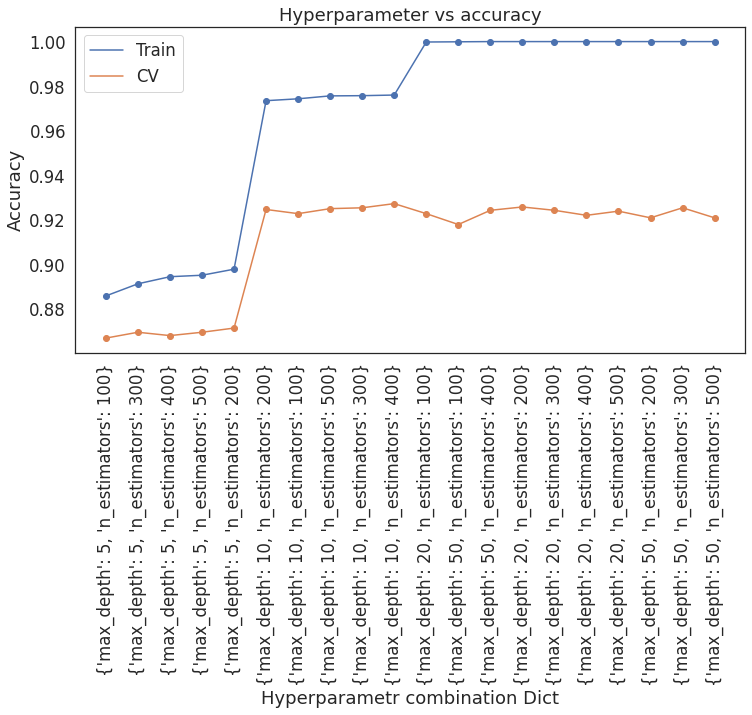

In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {'max_depth':[5,10,20,50], 'n_estimators': [100,200,300,400,500]}
clf_rf = RandomForestClassifier(class_weight='balanced', random_state=rnd_state)      
grid = GridSearchCV(estimator=clf_rf,param_grid=parameters,scoring= 'accuracy',return_train_score= True,verbose=1)
grid.fit(X_train,y_train)

print("-----"*20)
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by= 'mean_train_score', ascending=True)
params = list(cv_result['params'].astype(str))

plt.figure(figsize=(12,6))
plt.scatter(params,cv_result['mean_train_score'])
plt.plot(params,cv_result['mean_train_score'],label='Train')
plt.scatter(params,cv_result['mean_test_score'])
plt.plot(params,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

In [ ]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [ ]:
best_max_depth = grid.best_params_['max_depth']
best_n_estimator = grid.best_params_['n_estimators']

Train accuracy RF:  0.9726181545386346
Test accuracy RF:  0.9340329835082459
Recall Score:  0.7425742574257426
----------------------------------------------------------------------------------------------------


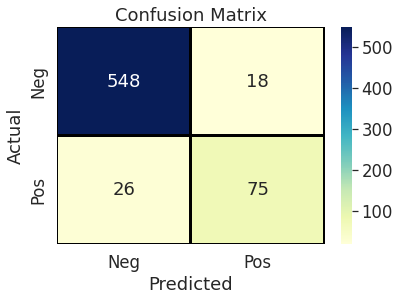

In [ ]:
# Create a new model with optimum hyperparameters
clf_rf = RandomForestClassifier(max_depth=best_max_depth, n_estimators= best_n_estimator, class_weight ='balanced', random_state=rnd_state)
clf_rf.fit(X_train,y_train)

result5 = ["5.","RF","Balanced using class weights"]
y_pred_tr = clf_rf.predict(X_train)
print('Train accuracy RF: ',accuracy_score(y_train,y_pred_tr))
result5.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = clf_rf.predict(X_test)
print('Test accuracy RF: ',accuracy_score(y_test,y_pred_test))
result5.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result5.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

#### RF SMOTE balanced dataset

Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------------------------------------------------------------------------------------------------


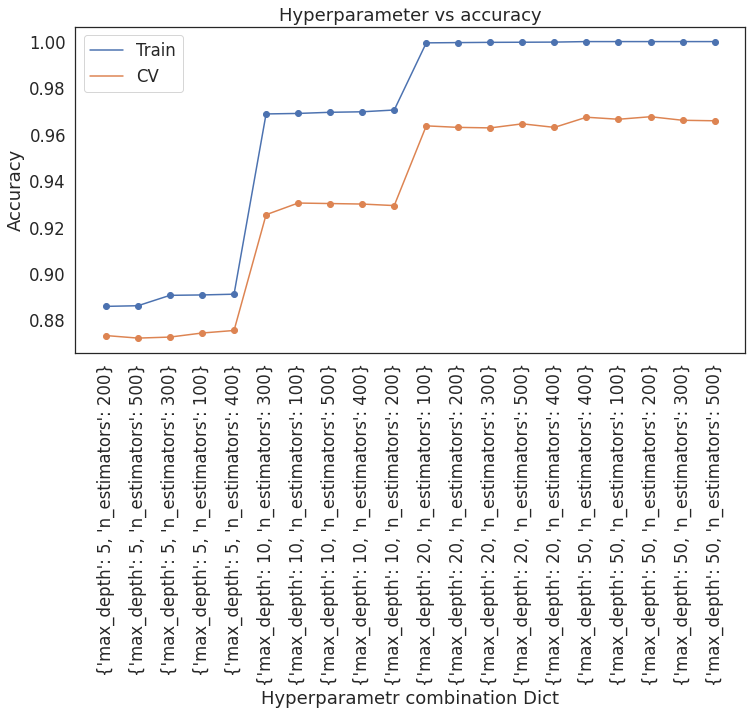

In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {'max_depth':[5,10,20,50], 'n_estimators': [100,200,300,400,500]}
clf_rf = RandomForestClassifier(random_state=rnd_state)      
grid = GridSearchCV(estimator=clf_rf,param_grid=parameters,scoring= 'accuracy',return_train_score= True,verbose=1)
grid.fit(X_train_sm,y_train_sm)

print("-----"*20)
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by= 'mean_train_score', ascending=True)
params = list(cv_result['params'].astype(str))

plt.figure(figsize=(12,6))
plt.scatter(params,cv_result['mean_train_score'])
plt.plot(params,cv_result['mean_train_score'],label='Train')
plt.scatter(params,cv_result['mean_test_score'])
plt.plot(params,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

In [ ]:
grid.best_params_

{'max_depth': 50, 'n_estimators': 200}

In [ ]:
best_max_depth = grid.best_params_['max_depth']
best_n_estimator = grid.best_params_['n_estimators']

Train accuracy RF:  1.0
Test accuracy RF:  0.8770614692653673
Recall Score:  0.7524752475247525
----------------------------------------------------------------------------------------------------


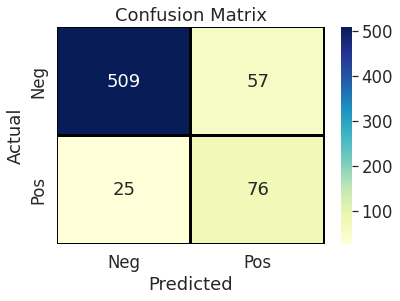

In [ ]:
# Best parameter
# Creat a new model with optimum hyperparameters
clf_rf = RandomForestClassifier(max_depth=best_max_depth, n_estimators= best_n_estimator, random_state=rnd_state)
clf_rf.fit(X_train_sm,y_train_sm)

result6 = ["6.","RF","SMOTE balancing"]
y_pred_tr = clf_rf.predict(X_train_sm)
print('Train accuracy RF: ',accuracy_score(y_train_sm,y_pred_tr))
result6.append(round(accuracy_score(y_train_sm,y_pred_tr),2))

y_pred_test = clf_rf.predict(X_test)
print('Test accuracy RF: ',accuracy_score(y_test,y_pred_test))
result6.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result6.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

### XgBoost Classifier

#### XgBoost Classifier with built-in balancing

In [ ]:
import math
scale=y_train.value_counts()[0]/y_train.value_counts()[1]
scale

2.45

Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------------------------------------------------------------------------------------------------


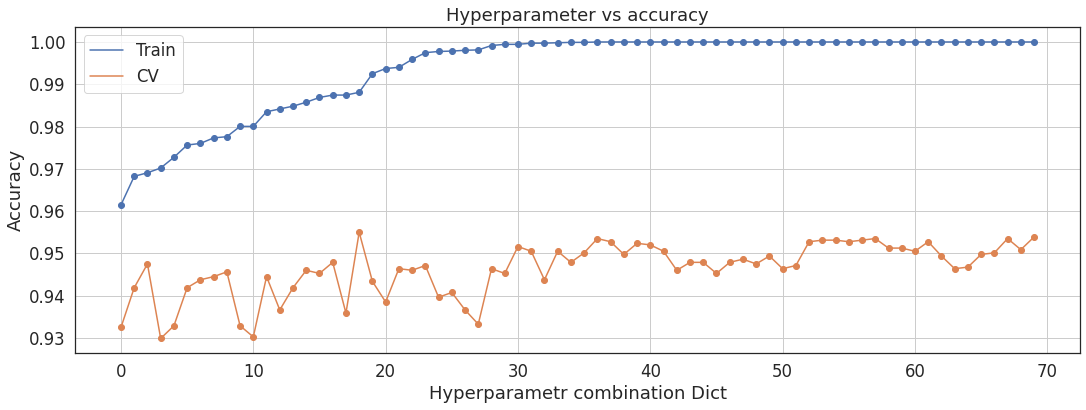

In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {"learning_rate"    : [0.10,0.20,0.30 ],\
              "max_depth"        : [ 3,5,10,20],\
              "n_estimators" : [ 100, 200, 300, 500],\
              "colsample_bytree" : [ 0.3, 0.5, 0.7 ] }
clf_xgb = XGBClassifier(scale_pos_weight=scale, eval_metric ='mlogloss')
grid = GridSearchCV(estimator=clf_xgb, param_grid=parameters, scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

print("-----"*20)
# plotting only the first 70 train scores
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score',ascending=True)[:70]
param_list = list(cv_result['params'])
param_index = np.arange(70)
plt.figure(figsize=(18,6))
plt.scatter(param_index,cv_result['mean_train_score'])
plt.plot(param_index,cv_result['mean_train_score'],label='Train')
plt.scatter(param_index,cv_result['mean_test_score'])
plt.plot(param_index,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.grid()
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
#plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

In [ ]:
grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [ ]:
best_parameters = [grid.best_params_[key] for key in grid.best_params_.keys()]
best_parameters

[0.7, 0.1, 5, 100]

Train accuracy XGB:  0.9849962490622656
Test accuracy XGB:  0.9580209895052474
Recall Score:  0.8118811881188119
----------------------------------------------------------------------------------------------------


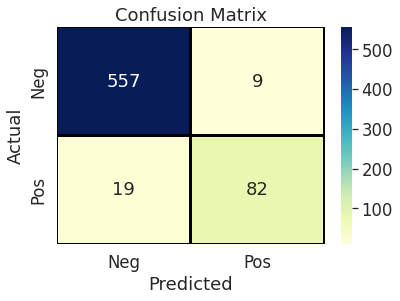

In [ ]:
# Now train a new XgBoost model using the optimum hyperparameters: 
clf_xgb = XGBClassifier(learning_rate= best_parameters[1] ,max_depth=best_parameters[2], n_estimators=best_parameters[3], colsample_bytree=best_parameters[0], \
                        eval_metric='mlogloss', scale_pos_weight=scale)
clf_xgb.fit(X_train,y_train)

result7 = ["7.","XGBClassifier","Balanced using scale_pos_weight"]
y_pred_tr = clf_xgb.predict(X_train)
print('Train accuracy XGB: ',accuracy_score(y_train,y_pred_tr))
result7.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = clf_xgb.predict(X_test)
print('Test accuracy XGB: ',accuracy_score(y_test,y_pred_test))
result7.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result7.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

#### XgBoost with SMOTE balanced data

Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------------------------------------------------------------------------------------------------


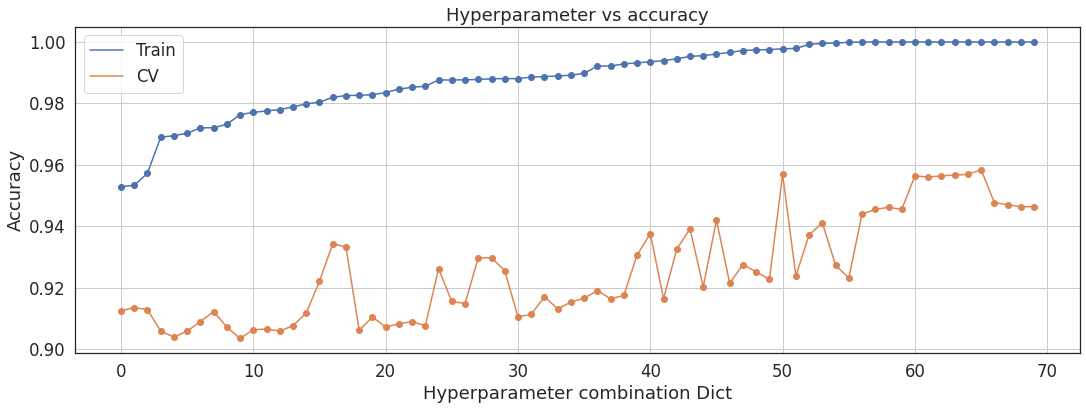

In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {"learning_rate"    : [0.10,0.20,0.30 ],\
              "max_depth"        : [ 3,5,10,20],\
              "n_estimators" : [ 100, 200, 300, 500],\
              "colsample_bytree" : [ 0.3, 0.5, 0.7 ] }
clf_xgb = XGBClassifier(eval_metric='mlogloss')
grid = GridSearchCV(estimator=clf_xgb, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train_sm,y_train_sm)

print("-----"*20)
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score',ascending=True)[:70]
param_list = list(cv_result['params'])
param_index = np.arange(70)
plt.figure(figsize=(18,6))
plt.scatter(param_index,cv_result['mean_train_score'])
plt.plot(param_index,cv_result['mean_train_score'],label='Train')
plt.scatter(param_index,cv_result['mean_test_score'])
plt.plot(param_index,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.grid()
plt.legend()
plt.xlabel('Hyperparameter combination Dict')
#plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

In [ ]:
grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200}

In [ ]:
best_parameters = [grid.best_params_[key] for key in grid.best_params_.keys()]
best_parameters

[0.7, 0.1, 10, 200]

Train accuracy XGB:  1.0
Test accuracy XGB:  0.8665667166416792
Recall Score:  0.8514851485148515
----------------------------------------------------------------------------------------------------


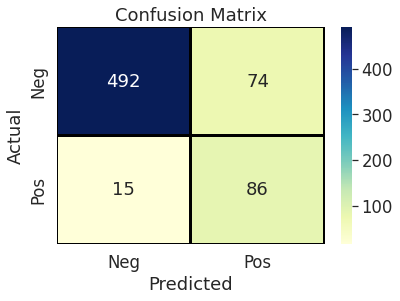

In [ ]:
clf_xgb = XGBClassifier(learning_rate=best_parameters [1],max_depth=best_parameters[2], n_estimators=best_parameters[3], colsample_bytree=best_parameters[0], \
                        eval_metric='mlogloss')
clf_xgb.fit(X_train_sm,y_train_sm)

result8 = ["8.","XGBClassifier","SMOTE balancing"]
y_pred_tr = clf_xgb.predict(X_train_sm)
print('Train accuracy XGB: ',accuracy_score(y_train_sm,y_pred_tr))
result8.append(round(accuracy_score(y_train_sm,y_pred_tr),2))

y_pred_test = clf_xgb.predict(X_test)
print('Test accuracy XGB: ',accuracy_score(y_test,y_pred_test))
result8.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result8.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

## RESULTS


In [ ]:
from prettytable import PrettyTable

In [ ]:
Result_table = PrettyTable(["S.No.","Model","class imbalance status","Train_accuracy","Test_Accuracy","Test_Recall_score"])
Result_table.add_rows(
    [
        result1,
        result2,
        result3,
        result4,
        result5,
        result6,
        result7,
        result8
    ]
)
print(Result_table)

+-------+---------------+---------------------------------+----------------+---------------+-------------------+
| S.No. |     Model     |      class imbalance status     | Train_accuracy | Test_Accuracy | Test_Recall_score |
+-------+---------------+---------------------------------+----------------+---------------+-------------------+
|   1.  |      SVM      |        No class balancing       |      0.97      |      0.92     |        0.57       |
|   2.  |      SVM      |   Balanced using class weights  |      0.98      |      0.91     |        0.71       |
|   3.  |      SVM      |         SMOTE balancing         |      1.0       |      0.91     |        0.57       |
|   4.  |       RF      |           No Balancing          |      1.0       |      0.93     |        0.55       |
|   5.  |       RF      |   Balanced using class weights  |      0.97      |      0.93     |        0.74       |
|   6.  |       RF      |         SMOTE balancing         |      1.0       |      0.88     |    